# Lets grow more - Data science Internship

## Level of the task - Advanced Level

## Task 2 - Next Word Prediction

In [17]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


### Import all the neccessary libraries

In [18]:
import numpy as np
import keras.layers
import tensorflow as tf
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize

from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers import Dense, Activation

#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### Load the dataset and read the txt file

In [19]:
path = "D:/VIT FOLDER/Internships__2023/lets grow more - data science/nxtwordprediction_ds.txt"
text = open(path, encoding='utf-8').read().lower()
print('Dataset length:', len(text))

Dataset length: 581888


### Perform Data Pre-processing

In [20]:
tokenizer = RegexpTokenizer("[\w']+")
words = tokenizer.tokenize(text)

words

['project',
 "gutenberg's",
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'anonymo

In [21]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

unique_word_index

{"'as": 0,
 '0': 1,
 '000': 2,
 '1': 3,
 '10': 4,
 '100': 5,
 '1000': 6,
 '10_s_': 7,
 '10th': 8,
 '11': 9,
 '117': 10,
 '120': 11,
 '12_s_': 12,
 '12th': 13,
 '14': 14,
 '140': 15,
 '15': 16,
 '150': 17,
 '1500': 18,
 '1661': 19,
 '16a': 20,
 '17': 21,
 '1846': 22,
 '1858': 23,
 '1869': 24,
 '1870': 25,
 '1878': 26,
 '1883': 27,
 '1884': 28,
 '1887': 29,
 '1888': 30,
 '1890': 31,
 '19th': 32,
 '1_s_': 33,
 '2': 34,
 '20': 35,
 '200': 36,
 '2001': 37,
 '2002': 38,
 '2019': 39,
 '220': 40,
 '221b': 41,
 '226': 42,
 '22nd': 43,
 '249': 44,
 '25': 45,
 '250': 46,
 '26': 47,
 '26_s_': 48,
 '27': 49,
 '270': 50,
 '29': 51,
 '2_s_': 52,
 '2nd': 53,
 '3': 54,
 '30': 55,
 '31': 56,
 '35': 57,
 '3rd': 58,
 '4': 59,
 '40': 60,
 '4000': 61,
 '421': 62,
 '4700': 63,
 '4_d_': 64,
 '4th': 65,
 '4½': 66,
 '5': 67,
 '50': 68,
 '501': 69,
 '596': 70,
 '6': 71,
 '60': 72,
 '6221541': 73,
 '64': 74,
 '6_d_': 75,
 '7': 76,
 '700': 77,
 '750': 78,
 '750175': 79,
 '77': 80,
 '7_s_': 81,
 '7th': 82,
 '8': 83

In [22]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])

print(prev_words[0])
print(next_words[0])

['project', "gutenberg's", 'the', 'adventures', 'of']
sherlock


In [23]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)

In [25]:
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [26]:
print(X[0][0])

[False False False ... False False False]


### Create a RNN model

In [27]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [28]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=40, shuffle=True).history

Epoch 1/40
811/811 [==============================] - 128s 154ms/step - loss: 6.3304 - accuracy: 0.0714 - val_loss: 6.9261 - val_accuracy: 0.0861
Epoch 2/40
811/811 [==============================] - 132s 162ms/step - loss: 5.7669 - accuracy: 0.1147 - val_loss: 6.7661 - val_accuracy: 0.0974
Epoch 3/40
811/811 [==============================] - 138s 170ms/step - loss: 5.4797 - accuracy: 0.1358 - val_loss: 6.7910 - val_accuracy: 0.1024
Epoch 4/40
811/811 [==============================] - 136s 168ms/step - loss: 5.2489 - accuracy: 0.1517 - val_loss: 6.6531 - val_accuracy: 0.0949
Epoch 5/40
811/811 [==============================] - 142s 175ms/step - loss: 5.0206 - accuracy: 0.1695 - val_loss: 6.6545 - val_accuracy: 0.0987
Epoch 6/40
811/811 [==============================] - 140s 172ms/step - loss: 4.7842 - accuracy: 0.1924 - val_loss: 6.7283 - val_accuracy: 0.0989
Epoch 7/40
811/811 [==============================] - 141s 174ms/step - loss: 4.5292 - accuracy: 0.2178 - val_loss: 6.7671 -

In [29]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


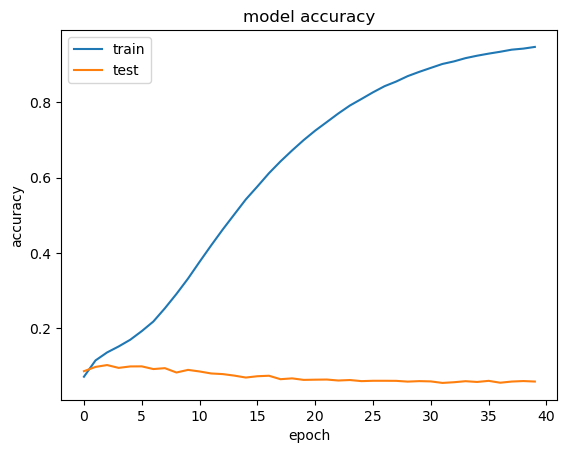

In [30]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

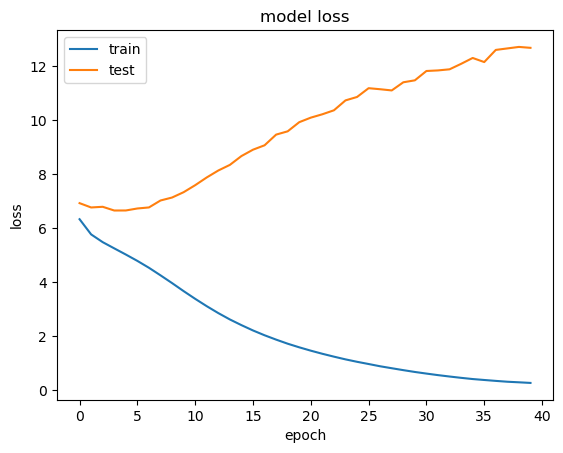

In [32]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [33]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x

prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [35]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [36]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [37]:
quotes = [
    "Attitude is a little thing that makes a big difference.",
    "That which does not kill us makes us stronger.",
    "Light the candle instead of cursuing darkness.",
    "Are you lost baby girl?",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [38]:
for q in quotes:
    seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
    print("Sequence: ", seq)
    print("\nnext possible words: ", predict_completions(seq, 5))

Sequence:  attitude is a little thing
attitude
is
a
little
thing

next possible words:  ['said', 'and', 'but', 'up', 'still']
Sequence:  that which does not kill
that
which
does
not
kill

next possible words:  ['it', 'their', 'such', 'remain', 'yourself']
Sequence:  light the candle instead of
light
the
candle
instead
of

next possible words:  ['being', 'seeing', 'those', 'theories', 'having']
Sequence:  are you lost baby girl
are
you
lost
baby
girl

next possible words:  ['lestrade', 'of', 'threatened', 'voice', 'part']
Sequence:  it is hard enough to
it
is
hard
enough
to

next possible words:  ['mind', 'a', 'have', 'should', 'me']
